In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os 

sns.set_context('poster')
sns.set_theme(style="darkgrid")


GILON_15_FEATURE_LISTS = [
    "right_accel_x",
    "right_accel_y",
    "right_accel_z",
    "left_accel_x",
    "left_accel_y",
    "left_accel_z",
    "right_fsr1",
    "right_fsr2",
    "right_fsr3",
    "right_fsr4",
    "left_fsr1",
    "left_fsr2",
    "left_fsr3",
    "left_fsr4",
    "pseudo_channel",
]

In [2]:
cv_num = 2
white_noise = pd.read_csv(f"../outputs/gilon_activity/EXP900/cv{cv_num}/channel_attention_scores.csv")
white_noise_df = white_noise.groupby('epoch').mean().reset_index(drop=True).iloc[:,1:]
white_noise_df.columns = GILON_15_FEATURE_LISTS
white_noise_df = white_noise_df.reset_index()
white_noise_df = white_noise_df.rename(columns={'index':'epoch'})
white_noise_df = white_noise_df.melt(id_vars=['epoch'])

sine_noise = pd.read_csv("../outputs/gilon_activity/EXP901/cv1/channel_attention_scores.csv")
sine_noise_df = sine_noise.groupby('epoch').mean().reset_index(drop=True).iloc[:,1:]
sine_noise_df.columns = GILON_15_FEATURE_LISTS
sine_noise_df = sine_noise_df.reset_index()
sine_noise_df = sine_noise_df.rename(columns={'index':'epoch'})
sine_noise_df = sine_noise_df.melt(id_vars=['epoch'])


gp_noise = pd.read_csv(f"../outputs/gilon_activity/EXP902/cv{cv_num}/channel_attention_scores.csv")
gp_noise_df = gp_noise.groupby('epoch').mean().reset_index(drop=True).iloc[:,1:]
gp_noise_df.columns = GILON_15_FEATURE_LISTS
gp_noise_df = gp_noise_df.reset_index()
gp_noise_df = gp_noise_df.rename(columns={'index':'epoch'})
gp_noise_df = gp_noise_df.melt(id_vars=['epoch'])

In [19]:
# save the dataframes
white_noise_df.to_csv(f"dataset/gilon_activity/pseudo_white_noise.csv", index=False)
sine_noise_df.to_csv(f"dataset/gilon_activity/pseudo_sine_noise.csv", index=False)
gp_noise_df.to_csv(f"dataset/gilon_activity/pseudo_gp_noise.csv", index=False)

In [3]:
def apply_linewidth(df):
    df['linewidth'] = 10
    df.loc[df['variable']=='pseudo_channel', 'linewidth'] = 100
    return df

In [4]:
importance_value = white_noise_df[white_noise_df['epoch']==7]
importance_value = importance_value.sort_values(by='value', ascending=False)
importance_value = importance_value.reset_index(drop=True)
importance_value

,epoch,variable,value
0,7,right_accel_x,0.426692
1,7,left_accel_x,0.191460
2,7,right_accel_y,0.176383
3,7,right_accel_z,0.175784
4,7,right_fsr2,0.159901
5,7,left_fsr3,0.145963
6,7,left_fsr1,0.136052
7,7,right_fsr4,0.127002
8,7,left_accel_y,0.120395
9,7,right_fsr1,0.107709


In [5]:
color_dict = {}
for i, variable in enumerate(white_noise_df['variable'].unique()):
    if variable =='pseudo_channel':
        color_dict[variable] = '#fd625e'
    else:
        color_dict[variable] = 'darkgrey'

In [6]:
white_noise_melt = apply_linewidth(white_noise_df)
sine_noise_melt = apply_linewidth(sine_noise_df)
gp_noise_melt = apply_linewidth(gp_noise_df)

In [7]:
white_noise_melt

,epoch,variable,value,linewidth
0,0,right_accel_x,0.535556,10
1,1,right_accel_x,0.724360,10
2,2,right_accel_x,0.587752,10
3,3,right_accel_x,0.564769,10
4,4,right_accel_x,0.493684,10
...,...,...,...,...
115,3,pseudo_channel,0.120413,100
116,4,pseudo_channel,0.088216,100
117,5,pseudo_channel,0.067083,100
118,6,pseudo_channel,0.052179,100


In [8]:
# check seaborn version
sns.__version__

'0.12.0'

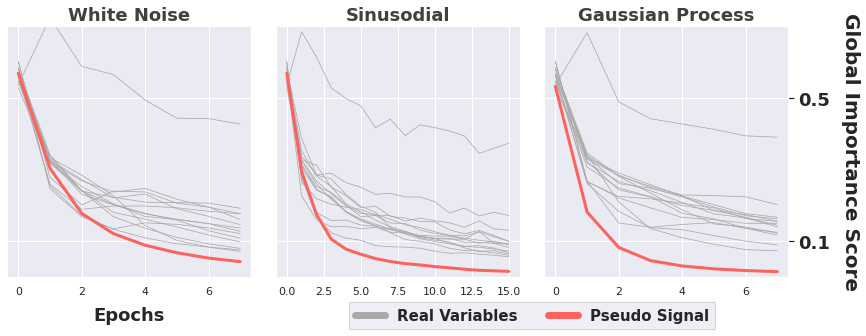

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6),
                         gridspec_kw={'wspace':0.1})
sns.lineplot(ax=axes[0], data=white_noise_melt,x='epoch', y='value', hue='variable', palette=color_dict, size='linewidth')
axes[0].legend_.remove()
axes[0].set_title('White Noise', fontsize=18, fontweight='bold', color='#41403F')

sns.lineplot(data=sine_noise_melt, x='epoch', y='value', hue='variable', ax=axes[1], palette=color_dict, size='linewidth')
axes[1].set_title('Sinusodial',fontsize=18, fontweight='bold', color='#41403F')
axes[1].legend_.remove()

sns.lineplot(data=gp_noise_melt, x='epoch', y='value', hue='variable', ax=axes[2], palette=color_dict, size='linewidth')
axes[2].set_title('Gaussian Process',fontsize=18, fontweight='bold', color='#41403F')
handles, labels = axes[2].get_legend_handles_labels()
fig.subplots_adjust(bottom=0.3, wspace=0.33)
axes[2].legend(handles=[handles[1], handles[-4]], labels=['Real Variables', 'Pseudo Signal'],loc='upper center', 
             bbox_to_anchor=(-0.05, -0.07),fancybox=False, shadow=False, ncol=2, fontsize=15)

for i in range(3):
    # fix y axis
    axes[i].set_ylim(0, 0.7)
    # remove x label
    axes[i].set_xlabel('')
    # remove y tick label
    axes[i].set_ylabel('')
    axes[i].set_yticks([0.1, 0.5])
    # remove y tick label
    axes[i].set_yticklabels('')
    # set larger x ticks

    

# # set y_ticklabel for axes[2] only, on the right side of the plot
axes[2].yaxis.tick_right()
axes[2].yaxis.set_label_position("right")
axes[2].set_yticklabels(['0.1', '0.5'], fontsize=18, fontweight='bold')


axes[2].set_ylabel('Global Importance Score', fontsize=20, fontweight='bold', rotation=270, labelpad=30)
# axes[2].yaxis.set_label_coords(1.1, 0.5)
leg = axes[2].get_legend()
for line in leg.get_lines():
    line.set_linewidth(7.0)
for text in axes[2].get_legend().get_texts():
    plt.setp(text, fontweight='bold')
# set x axis label
axes[0].set_xlabel('Epochs', fontsize=18,fontweight='bold', labelpad=10)


# save 
plt.savefig('results/pseudo_channel/add_pseudo_rps.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_2891392/2596225295.py:36: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.3, wspace=0.33)


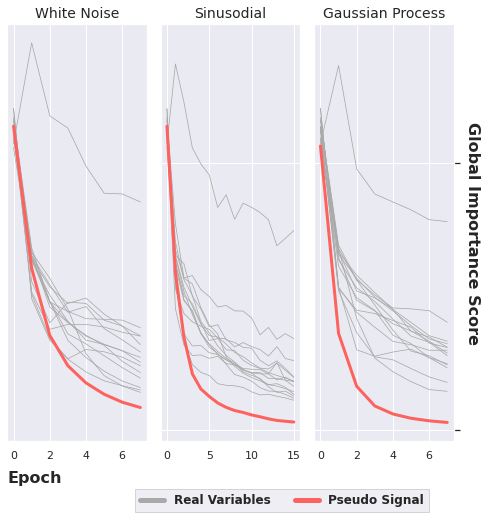

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(8, 10),
                         gridspec_kw={'wspace':0.1},
                         constrained_layout=True, sharey=True)
#fig.suptitle('Robustness to Pseudo Signals', fontsize=19, fontweight='bold', y=1)
sns.lineplot(data=white_noise_melt, x='epoch', y='value', hue='variable', ax=axes[0], palette=color_dict, size='linewidth')
axes[0].legend_.remove()
axes[0].set_title('White Noise', fontsize=14)
# set Y axis label
# axes[0].set_ylabel('Global Importance Score', fontsize=16, fontweight='bold')
# Set Y axis ticks
# axes[0].set_yticks([0.0, 0.5, 0.8], minor=False, fontsize=14)


# remove Y axis label for axes[0]
axes[0].set_ylabel('')
# remove Y axis ticks for axes[0]
axes[0].set_yticks([], minor=False)
# remove y for axes[0]
axes[0].yaxis.set_visible(False)
# set Y axis label for axes[2]
axes[2].set_ylabel('Global Importance Score', fontsize=16, fontweight='bold', rotation=270, labelpad=20)
axes[2].set_yticks([0.0, 0.5, 0.8], minor=False, fontsize=14, rotation=270)
axes[2].yaxis.tick_right()
axes[2].yaxis.set_label_position("right")

# set y tick on the right side of axes[2]


sns.lineplot(data=sine_noise_melt, x='epoch', y='value', hue='variable', ax=axes[1], palette=color_dict, size='linewidth')
axes[1].legend_.remove()
axes[1].set_title('Sinusodial', fontsize=14)

sns.lineplot(data=gp_noise_melt, x='epoch', y='value', hue='variable', ax=axes[2], palette=color_dict, size='linewidth')
axes[2].set_title('Gaussian Process', fontsize=14)
handles, labels = axes[2].get_legend_handles_labels()
fig.subplots_adjust(bottom=0.3, wspace=0.33)
axes[2].legend(handles=[handles[1], handles[-4]], labels=['Real Variables', 'Pseudo Signal'],loc='upper center', 
             bbox_to_anchor=(-0.23, -0.1),fancybox=False, shadow=False, ncol=2, fontsize=12)

leg = axes[2].get_legend()
for line in leg.get_lines():
    line.set_linewidth(5.0)
for text in axes[2].get_legend().get_texts():


    plt.setp(text, fontweight='bold')
# set x axis label
axes[0].set_xlabel('Epoch', fontsize=16,fontweight='bold', labelpad=10, x=0.2)
axes[1].set_xlabel('', fontsize=16)
axes[2].set_xlabel('', fontsize=16)

# set legend title bold
# save 
plt.savefig('results/pseudo_channel/add_pseudo_rps.png', dpi=300, bbox_inches='tight')

In [62]:
color_dict

{'right_accel_x': 'darkgrey',
 'right_accel_y': 'darkgrey',
 'right_accel_z': 'darkgrey',
 'left_accel_x': 'darkgrey',
 'left_accel_y': 'darkgrey',
 'left_accel_z': 'darkgrey',
 'right_fsr1': 'darkgrey',
 'right_fsr2': 'darkgrey',
 'right_fsr3': 'darkgrey',
 'right_fsr4': 'darkgrey',
 'left_fsr1': 'darkgrey',
 'left_fsr2': 'darkgrey',
 'left_fsr3': 'darkgrey',
 'left_fsr4': 'darkgrey',
 'pseudo_channel': '#fd625e'}